In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from IPython.display import Image, display
from PIL import Image
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes import jtplot
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
import plotly.express as px

https://business.facebook.com/refyld/insights/?business_id=2025473311051656&section=navAPI

In [3]:
os.chdir(r'C:\Users\bruna\IronHack\Project Refyld\Refyld\données')

## Lets get information about the Facebook Page

### Getting the data

#### Janvier 2021 - Mars 2021

In [4]:
df_2021 = pd.read_csv('Page_FB_Jan_Mars_2021.csv')


#### Dec 2020 - 14 Aout 2020

In [5]:
df_2020  = pd.read_csv('Page_FB_Dec_Oct_2020.csv')


#### Let's concat (merge) all the dataframes

In [6]:
df = pd.concat([df_2020, df_2021])

In [7]:
df.reset_index(drop=True, inplace=True)


In [10]:
df.to_csv('FB_PAGE_2020_2021.csv')


#### We only need the daily

In [8]:
def get_date_sep(x):
    df_day = pd.DataFrame()
    df_day = df_day.append(x['Date'])
    df_week = pd.DataFrame()
    df_week = df_week.append(x['Date'])
    df_month = pd.DataFrame()
    df_month = df_month.append(x['Date'])
    df_others = pd.DataFrame()
    for i in x:
        if 'Daily' in i:
            df_day = df_day.append(x[f'{i}'])
        if 'Weekly' in i:
            df_week = df_week.append(x[f'{i}'])
        if '28 Days' in i:
            df_month = df_month.append(x[f'{i}'])
        elif 'Daily' not in i and 'Weekly' not in i and '28' not in i:
            df_others = df_others.append(x[f'{i}'])

    return df_day.T, df_week.T, df_month.T, df_others.T

In [9]:
df_day, df_week, df_month, df_others = get_date_sep(df)

df_day

,Date,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Daily Total Reach,Daily Organic Reach,Daily Paid Reach,Daily Viral Reach,Daily Total Impressions,Daily Organic impressions,...,"Daily City: People Talking About This - Tournai, Belgique",Daily City: People Talking About This - Valloire,Daily City: People Talking About This - Villeneuve-d'Ascq,Daily Logged-in Tab Views - (null),Daily External Referrers - https://refyld.com/,Daily External Referrers - https://refyld.com/blogs/journal/plastique-et-crise-climatique,Daily External Referrers - https://refyld.com/challenge,Daily External Referrers - https://refyld.com/pages/ladhesion,Daily External Referrers - https://refyld.com/pages/quisommes-nous,Daily External Referrers - https://www.okpal.com/refyld-la-qualite-accessible-a-tous-tes/?_ga=2.263060556.111209855.1609942885-1715629192.1609942885
0,NaN,Daily: The number of new people who have liked...,Daily: The number of Unlikes of your Page (Uni...,Daily: The number of people who engaged with y...,Daily: The number of people who had any conten...,Daily: The number of people who had any conten...,Daily: The number of people who had any conten...,Daily: The number of people who had any conte...,Daily: The number of times any content from yo...,Daily: The number of times any content from yo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-30,2,1,80,753,753,NaN,460,1448,1378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-01,1,NaN,34,329,329,NaN,241,447,436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-02,3,4,84,596,596,NaN,243,1027,971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-03,1,4,52,516,513,NaN,236,880,848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-03-24,NaN,NaN,116,7567,230,7413,31,7994,290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
178,2021-03-25,NaN,NaN,80,6859,91,6744,38,7306,171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,2021-03-26,NaN,NaN,54,3815,246,3578,28,4245,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,2021-03-27,NaN,NaN,147,8199,61,8145,19,8480,86,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Let's get description of insights

In [11]:
def get_description(x):
    descrition = x[:1].T
    descrition = descrition.dropna()
    descrition.reset_index(inplace=True)
    descrition.rename(columns={'index':'title', 0:'Desc'}, inplace=True)
    description = pd.Series(descrition.Desc.values,index=descrition.title).to_dict()
    return description

In [12]:
description = get_description(df_day)

In [13]:
description

{'Daily New Likes': 'Daily: The number of new people who have liked your Page (Unique Users)',
 'Daily Unlikes': 'Daily: The number of Unlikes of your Page (Unique Users)',
 'Daily Page Engaged Users': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
 'Daily Total Reach': 'Daily: The number of people who had any content from your Page or about your Page enter their screen. This includes posts, check-ins, ads, social information from people who interact with your Page and more. (Unique Users)',
 'Daily Organic Reach': 'Daily: The number of people who had any content from your Page or about your Page enter their screen through unpaid distribution. This includes posts, stories, check-ins, social information from people who interact with your Page and more. (Unique Users)',
 'Daily Paid Reach': 'Daily: The number of people who had any content from your Page or about your Page enter their screen through paid distributi

#### The description there is no more need for us

In [14]:
null_rows = df_day.loc[df_day['Date'].isnull()]
null_rows

,Date,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Daily Total Reach,Daily Organic Reach,Daily Paid Reach,Daily Viral Reach,Daily Total Impressions,Daily Organic impressions,...,"Daily City: People Talking About This - Tournai, Belgique",Daily City: People Talking About This - Valloire,Daily City: People Talking About This - Villeneuve-d'Ascq,Daily Logged-in Tab Views - (null),Daily External Referrers - https://refyld.com/,Daily External Referrers - https://refyld.com/blogs/journal/plastique-et-crise-climatique,Daily External Referrers - https://refyld.com/challenge,Daily External Referrers - https://refyld.com/pages/ladhesion,Daily External Referrers - https://refyld.com/pages/quisommes-nous,Daily External Referrers - https://www.okpal.com/refyld-la-qualite-accessible-a-tous-tes/?_ga=2.263060556.111209855.1609942885-1715629192.1609942885
0,NaN,Daily: The number of new people who have liked...,Daily: The number of Unlikes of your Page (Uni...,Daily: The number of people who engaged with y...,Daily: The number of people who had any conten...,Daily: The number of people who had any conten...,Daily: The number of people who had any conten...,Daily: The number of people who had any conte...,Daily: The number of times any content from yo...,Daily: The number of times any content from yo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,Daily: The number of new people who have liked...,Daily: The number of Unlikes of your Page (Uni...,Daily: The number of people who engaged with y...,Daily: The number of people who had any conten...,Daily: The number of people who had any conten...,Daily: The number of people who had any conten...,Daily: The number of people who had any conte...,Daily: The number of times any content from yo...,Daily: The number of times any content from yo...,...,NaN,NaN,NaN,Daily: Tabs on your Page that were viewed when...,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_day.drop([df_day.index[0], df_day.index[93]], axis = 0, inplace=True) 

In [235]:
df_others.drop([df_others.index[0], df_others.index[93]], axis = 0, inplace = True)

#### Lets reset the index because they are weird

In [17]:
df_day.reset_index(drop = True, inplace=True)

In [236]:
df_others.reset_index(drop = True, inplace = True)

In [238]:
df_others

,Date,Lifetime Total Likes,Lifetime Likes by Gender and Age - F.18-24,Lifetime Likes by Gender and Age - F.25-34,Lifetime Likes by Gender and Age - F.35-44,Lifetime Likes by Gender and Age - F.45-54,Lifetime Likes by Gender and Age - F.55-64,Lifetime Likes by Gender and Age - F.65+,Lifetime Likes by Gender and Age - M.13-17,Lifetime Likes by Gender and Age - M.18-24,...,Lifetime Likes by City - Boulogne-Billancourt,Lifetime Likes by City - Brest,Lifetime Likes by City - Champigny-sur-Marne,Lifetime Likes by City - Cran-Gévrier,Lifetime Likes by City - Duingt,Lifetime Likes by City - Les Vans,Lifetime Likes by City - Perpignan,Lifetime Likes by City - Roiffieux,Lifetime Likes by City - Rueil-Malmaison,Lifetime Likes by City - Sanary-sur-Mer
0,2020-09-30,992,126,309,131,75,26,13,1,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,993,126,309,131,75,26,13,1,55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-02,992,125,310,131,76,26,13,1,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-03,989,124,309,130,76,25,13,1,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-04,989,123,310,130,76,25,13,1,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2021-03-24,1259,113,433,202,103,36,21,2,38,...,3,NaN,NaN,3,NaN,NaN,NaN,7,3,NaN
176,2021-03-25,1259,113,433,202,103,36,21,2,38,...,NaN,3,NaN,3,NaN,NaN,NaN,7,NaN,NaN
177,2021-03-26,1259,111,434,203,103,36,21,2,38,...,4,3,3,NaN,NaN,NaN,NaN,7,NaN,NaN
178,2021-03-27,1259,111,434,203,103,36,21,2,37,...,4,NaN,NaN,NaN,NaN,NaN,NaN,7,3,NaN


#### Lets inverse the order to have the news dates in top

In [18]:
df_day = df_day.reindex(index=df_day.index[::-1])


In [239]:
df_others = df_others.reindex(index = df_others.index[::-1])

#### And reindex it encore

In [19]:
df_day.reset_index(drop = True, inplace=True)

In [240]:
df_others.reset_index(drop = True, inplace = True)

In [20]:
df_day

,Date,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Daily Total Reach,Daily Organic Reach,Daily Paid Reach,Daily Viral Reach,Daily Total Impressions,Daily Organic impressions,...,"Daily City: People Talking About This - Tournai, Belgique",Daily City: People Talking About This - Valloire,Daily City: People Talking About This - Villeneuve-d'Ascq,Daily Logged-in Tab Views - (null),Daily External Referrers - https://refyld.com/,Daily External Referrers - https://refyld.com/blogs/journal/plastique-et-crise-climatique,Daily External Referrers - https://refyld.com/challenge,Daily External Referrers - https://refyld.com/pages/ladhesion,Daily External Referrers - https://refyld.com/pages/quisommes-nous,Daily External Referrers - https://www.okpal.com/refyld-la-qualite-accessible-a-tous-tes/?_ga=2.263060556.111209855.1609942885-1715629192.1609942885
0,2021-03-28,NaN,NaN,139,10267,41,10221,16,10509,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-27,NaN,NaN,147,8199,61,8145,19,8480,86,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-26,NaN,NaN,54,3815,246,3578,28,4245,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-25,NaN,NaN,80,6859,91,6744,38,7306,171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-24,NaN,NaN,116,7567,230,7413,31,7994,290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2020-10-04,NaN,NaN,15,232,232,NaN,155,327,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,2020-10-03,1,4,52,516,513,NaN,236,880,848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,2020-10-02,3,4,84,596,596,NaN,243,1027,971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,2020-10-01,1,NaN,34,329,329,NaN,241,447,436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Lets check for duplicated

In [21]:
df_day.duplicated().sum()

0

#### Lets drop columns with full missing values

In [22]:
df_day.shape

(180, 716)

In [24]:
def drop_full_null_cols(x):
    for i in x:
        if x[f'{i}'].isnull().sum() == x.shape[0] :
            x.drop(f'{i}', axis = 1, inplace=True)
    return x

In [25]:
df_day = drop_full_null_cols(df_day)


In [31]:
df_day.fillna(0, inplace=True)

In [241]:
df_others.fillna(0, inplace = True)

In [38]:
df_day

,Date,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Daily Total Reach,Daily Organic Reach,Daily Paid Reach,Daily Viral Reach,Daily Total Impressions,Daily Organic impressions,...,"Daily City: People Talking About This - Tournai, Belgique",Daily City: People Talking About This - Valloire,Daily City: People Talking About This - Villeneuve-d'Ascq,Daily Logged-in Tab Views - (null),Daily External Referrers - https://refyld.com/,Daily External Referrers - https://refyld.com/blogs/journal/plastique-et-crise-climatique,Daily External Referrers - https://refyld.com/challenge,Daily External Referrers - https://refyld.com/pages/ladhesion,Daily External Referrers - https://refyld.com/pages/quisommes-nous,Daily External Referrers - https://www.okpal.com/refyld-la-qualite-accessible-a-tous-tes/?_ga=2.263060556.111209855.1609942885-1715629192.1609942885
0,2021-03-28,0,0,139,10267,41,10221,16,10509,99,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-03-27,0,0,147,8199,61,8145,19,8480,86,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-03-26,0,0,54,3815,246,3578,28,4245,320,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-03-25,0,0,80,6859,91,6744,38,7306,171,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-03-24,0,0,116,7567,230,7413,31,7994,290,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2020-10-04,0,0,15,232,232,0,155,327,320,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
176,2020-10-03,1,4,52,516,513,0,236,880,848,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
177,2020-10-02,3,4,84,596,596,0,243,1027,971,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
178,2020-10-01,1,0,34,329,329,0,241,447,436,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df_day.loc[:, df_day.columns != 'Date'] = df_day.loc[:, df_day.columns != 'Date'].astype(int)

In [242]:
df_others.loc[:, df_others.columns != 'Date'] = df_others.loc[:, df_others.columns != 'Date'].astype(int)

In [46]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 708 entries, Date to Daily External Referrers - https://www.okpal.com/refyld-la-qualite-accessible-a-tous-tes/?_ga=2.263060556.111209855.1609942885-1715629192.1609942885
dtypes: int32(707), object(1)
memory usage: 498.6+ KB


## Lets get the Insights

### Likes and Unlikes

In [47]:
def get_likes(x):
    l = ['Date']
    for i in x:
        if 'Likes' in i or 'Unlikes' in i:
            l.append(i)
            
    return x[l], l[1:]

In [78]:
df_likes, likes_cols = get_likes(df_day) 

In [79]:


df_likes['Daily Unlikes'] = df_likes['Daily Unlikes'].apply(lambda x : -x)

<ipython-input-79-0fef12f0f6d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_likes['Daily Unlikes'] = df_likes['Daily Unlikes'].apply(lambda x : -x)


In [80]:
df_likes.set_index('Date', inplace=True)

In [219]:
df_likes_ = df_likes.melt(value_name='Amount', var_name= 'Page Likes',ignore_index=False).reset_index()



In [163]:
from datetime import datetime as dt, timedelta
today = dt.today().date()
today

datetime.date(2021, 4, 16)

In [120]:
d = timedelta(days = 2)
d

datetime.timedelta(days=2)

In [167]:
dt(2020, 10, 1).date().isoformat()

'2020-10-01'

In [183]:
datem = dt(dt.today().year, dt.today().month, 1).date().isoformat()

In [184]:
datem

'2021-04-01'

In [185]:
week_ago = (dt.today() - timedelta(days=60)).date().isoformat()

In [186]:
week_ago

'2021-02-15'

In [173]:
week_ago = week_ago.date().isoformat()

In [175]:
type(week_ago)

str

In [176]:
last_day = dt(2021,3,28).date().isoformat()

In [177]:
last_day

'2021-03-28'

In [221]:
df_likes_.set_index('Date', inplace = True)

In [178]:
df_likes_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 2021-03-28 to 2020-09-30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Page Likes  360 non-null    object
 1   Amount      360 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 18.4+ KB


In [222]:
dff = df_likes_.loc[week_ago:last_day]

In [189]:
import plotly.graph_objects as go


In [223]:
dff

,Page Likes,Amount
Date,,
2021-03-28,Daily New Likes,0
2021-03-27,Daily New Likes,0
2021-03-26,Daily New Likes,0
2021-03-25,Daily New Likes,0
2021-03-24,Daily New Likes,0
...,...,...
2021-02-19,Daily Unlikes,0
2021-02-18,Daily Unlikes,0
2021-02-17,Daily Unlikes,0


In [199]:
dff = dff.groupby('Date').sum()

In [200]:
dff

,Amount
Date,
2021-02-15,1
2021-02-16,0
2021-02-17,0
2021-02-18,0
2021-02-19,0
2021-02-20,1
2021-02-21,0
2021-02-22,0
2021-02-23,0


In [83]:
df_likes_.to_csv('FB_Likes.csv')

#### We've got too many columns still
#### Lets separete it by periodicity

In [25]:
def get_date_sep(x):
    df_day = pd.DataFrame()
    df_day = df_day.append(x['Date'])
    df_week = pd.DataFrame()
    df_week = df_week.append(x['Date'])
    df_month = pd.DataFrame()
    df_month = df_month.append(x['Date'])
    df_others = pd.DataFrame()
    for i in x:
        if 'Daily' in i:
            df_day = df_day.append(x[f'{i}'])
        if 'Weekly' in i:
            df_week = df_week.append(x[f'{i}'])
        if '28 Days' in i:
            df_month = df_month.append(x[f'{i}'])
        elif 'Daily' not in i and 'Weekly' not in i and '28' not in i:
            df_others = df_others.append(x[f'{i}'])

    return df_day.T, df_week.T, df_month.T, df_others.T

In [26]:
df_day, df_week, df_month, df_others = get_date_sep(df)

In [27]:
df_day

,Date,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Daily Total Reach,Daily Organic Reach,Daily Paid Reach,Daily Viral Reach,Daily Total Impressions,Daily Organic impressions,...,"Daily City: People Talking About This - Tournai, Belgique",Daily City: People Talking About This - Valloire,Daily City: People Talking About This - Villeneuve-d'Ascq,Daily Logged-in Tab Views - (null),Daily External Referrers - https://refyld.com/,Daily External Referrers - https://refyld.com/blogs/journal/plastique-et-crise-climatique,Daily External Referrers - https://refyld.com/challenge,Daily External Referrers - https://refyld.com/pages/ladhesion,Daily External Referrers - https://refyld.com/pages/quisommes-nous,Daily External Referrers - https://www.okpal.com/refyld-la-qualite-accessible-a-tous-tes/?_ga=2.263060556.111209855.1609942885-1715629192.1609942885
0,2021-03-28,NaN,NaN,139,10267,41,10221,16,10509,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-27,NaN,NaN,147,8199,61,8145,19,8480,86,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-26,NaN,NaN,54,3815,246,3578,28,4245,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-25,NaN,NaN,80,6859,91,6744,38,7306,171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-24,NaN,NaN,116,7567,230,7413,31,7994,290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2020-10-05,1,NaN,17,329,327,NaN,90,448,442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2020-10-04,NaN,NaN,15,232,232,NaN,155,327,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,2020-10-03,1,4,52,516,513,NaN,236,880,848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,2020-10-02,3,4,84,596,596,NaN,243,1027,971,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
def get_dates(x):
    x['day'] = pd.to_datetime(x.Date, yearfirst=True).dt.day
    
    x['day_week'] = pd.to_datetime(x.Date, yearfirst=True).dt.day_name()
    
    x['week']=pd.to_datetime(x.Date, yearfirst=True).dt.isocalendar().week

    x['month']=pd.to_datetime(x.Date, yearfirst=True).dt.month_name()

    x['year']=pd.to_datetime(x.Date, yearfirst=True).dt.year
    
    x.set_index('Date', drop=True, append=True)
    
    return x.copy()



In [31]:
def drop_full_null_rows(x):
    x = x.T
    for i in x:
        if x[i].isnull().sum() == x.shape[0]-1 :
            x.drop(i, axis = 1, inplace=True)
    return x.T

In [32]:
df = drop_full_null_rows(df)
df 

,Date,Lifetime Total Likes,Daily New Likes,Daily Unlikes,Daily Page Engaged Users,Weekly Page Engaged Users,28 Days Page Engaged Users,Daily Total Reach,Weekly Total Reach,28 Days Total Reach,...,"28 Days City: People Talking About This - Sydney, Nouvelle-Galles du Sud, Australie",28 Days City: People Talking About This - Téteghem,"28 Days City: People Talking About This - Tarente, Pouilles, Italie",28 Days City: People Talking About This - Thouaré-sur-Loire,28 Days City: People Talking About This - Thourotte,"28 Days City: People Talking About This - Torres Vedras, Portugal","28 Days City: People Talking About This - Tournai, Belgique",28 Days City: People Talking About This - Valloire,28 Days City: People Talking About This - Villeneuve-d'Ascq,Daily Logged-in Tab Views - (null)
0,2021-03-28,1259,NaN,NaN,139,751,1558,10267,35192,54264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-27,1259,NaN,NaN,147,775,1424,8199,38648,49630,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,2021-03-26,1259,NaN,NaN,54,775,1292,3815,36829,45865,...,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN
3,2021-03-25,1259,NaN,NaN,80,783,1253,6859,36096,44396,...,NaN,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN
4,2021-03-24,1259,NaN,NaN,116,806,1171,7567,35627,41585,...,NaN,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2020-10-05,990,1,NaN,17,213,302,329,1749,2457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
175,2020-10-04,989,NaN,NaN,15,205,294,232,1698,2414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,2020-10-03,989,1,4,52,198,290,516,1597,2357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,2020-10-02,992,3,4,84,179,270,596,1450,2207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Lets get all the impressions

Le nombre de fois où un contenu de votre Page ou la concernant s’est affiché sur l’écran d’une personne. Cela inclut les publications, les stories, les visites, les pubs, les informations sociales sur les personnes qui interagissent avec votre Page et plus encore.


In [33]:

def get_impressions(x):
    l = ['Date']
    for i in x:
        if 'Impressions' in i or 'impressions' in i:
            l.append(i)
            
    return x[l], l[1:]

In [34]:
df_day_imp, cols_imp = get_impressions(df_day)

In [36]:
df_day_imp = df_day_imp.fillna(0)

In [49]:
df_day_imp = get_dates(df_day_imp)

In [ ]:
df.to_csv('FB_PAGE_2020_2021.csv')


In [38]:
description

{'Lifetime Total Likes': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
 'Daily New Likes': 'Daily: The number of new people who have liked your Page (Unique Users)',
 'Daily Unlikes': 'Daily: The number of Unlikes of your Page (Unique Users)',
 'Daily Page Engaged Users': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
 'Weekly Page Engaged Users': 'Weekly: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
 '28 Days Page Engaged Users': '28 Days: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
 'Daily Total Reach': 'Daily: The number of people who had any content from your Page or about your Page enter their screen. This includes posts, check-ins, ads, social information from people who interact with your Page and more. (Unique Users)',
 'Weekly Total

In [50]:
df_day_imp

,Date,Daily Total Impressions,Daily Organic impressions,Daily Paid Impressions,Daily Viral impressions,Daily Total Impressions of your posts,Daily Organic impressions of your posts,Daily Paid impressions of your posts,Daily Viral Impressions Of Your Posts,day_week,week,month,year,day
0,2021-03-28,10509,99,10385,16,10484,99,10385,16,Sunday,12,March,2021,28
1,2021-03-27,8480,86,8381,23,8467,86,8381,23,Saturday,12,March,2021,27
2,2021-03-26,4245,320,3906,31,4226,320,3906,31,Friday,12,March,2021,26
3,2021-03-25,7306,171,7113,40,7284,171,7113,40,Thursday,12,March,2021,25
4,2021-03-24,7994,290,7687,34,7977,290,7687,34,Wednesday,12,March,2021,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2020-10-05,448,442,0,109,393,393,0,109,Monday,41,October,2020,5
175,2020-10-04,327,320,0,184,320,320,0,184,Sunday,40,October,2020,4
176,2020-10-03,880,848,0,274,841,841,0,274,Saturday,40,October,2020,3
177,2020-10-02,1027,971,0,279,933,933,0,279,Friday,40,October,2020,2


In [52]:
df_day_imp.to_csv('Facebook_Impressions.csv')

In [33]:
def get_reach(x):
    l = ['Date']
    for i in x:
        if 'Reach' in i or 'reach' in i:
            l.append(i)
            
    return x[l], l[1:]    

In [34]:
df_day_reach, col_day_reach = get_reach(df_day)
df_day_reach = get_dates(df_day_reach)


<ipython-input-27-91bdf960b73b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['day_week'] = pd.to_datetime(x.Date, yearfirst=True).dt.day_name()
<ipython-input-27-91bdf960b73b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['week']=pd.to_datetime(x.Date, yearfirst=True).dt.isocalendar().week
<ipython-input-27-91bdf960b73b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [35]:
df_day_reach = df_day_reach.fillna(0)

In [36]:
df_day_reach

,Date,Daily Total Reach,Daily Organic Reach,Daily Paid Reach,Daily Viral Reach,Daily Reach Of Page Posts,Daily Organic Reach of Page posts,Daily Paid Reach of Page posts,Daily Viral Reach Of Page Posts,day_week,week,month,year
0,2021-03-28,10267,41,10221,16,10267,41,10221,16,Sunday,12,March,2021
1,2021-03-27,8199,61,8145,19,8199,61,8145,19,Saturday,12,March,2021
2,2021-03-26,3815,246,3578,28,3815,246,3578,28,Friday,12,March,2021
3,2021-03-25,6859,91,6744,38,6859,91,6744,38,Thursday,12,March,2021
4,2021-03-24,7567,230,7413,31,7567,230,7413,31,Wednesday,12,March,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2020-10-05,329,327,0,90,323,323,0,90,Monday,41,October,2020
175,2020-10-04,232,232,0,155,232,232,0,155,Sunday,40,October,2020
176,2020-10-03,516,513,0,236,509,509,0,236,Saturday,40,October,2020
177,2020-10-02,596,596,0,243,592,592,0,243,Friday,40,October,2020


In [37]:
df_day_reach[['Daily Total Reach', 'Daily Organic Reach', 'Daily Paid Reach']] = df_day_reach[['Daily Total Reach', 'Daily Organic Reach', 'Daily Paid Reach']].astype(int)

In [56]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

## Barplot about Reach Week Day

In [39]:
d_reach_day = df_day_reach.groupby(['day_week'])[['Daily Organic Reach', 'Daily Paid Reach']].mean().reindex(day_order)

In [40]:
d_reach_day

,Daily Organic Reach,Daily Paid Reach
day_week,,
Monday,315.640000,2229.440000
Tuesday,301.560000,2523.760000
Wednesday,289.240000,3000.520000
Thursday,294.923077,2862.730769
Friday,316.384615,2365.461538
Saturday,181.884615,2713.769231
Sunday,182.653846,3315.307692


In [41]:
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(10,10))
sns.barplot(data = d_reach_day, x= d_reach_day.index)

TypeError: Horizontal orientation requires numeric `x` variable.

In [42]:
from matplotlib.colors import ListedColormap


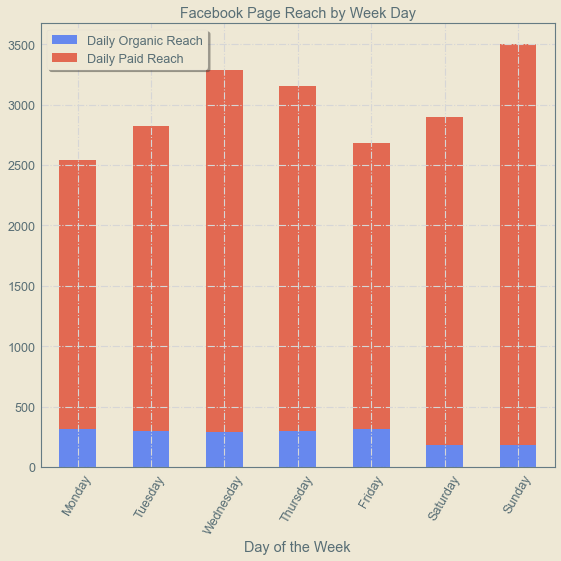

In [85]:
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(10,10))
my_cmap = ListedColormap(sns.color_palette('coolwarm'))
d_reach_day.plot.bar(stacked = True, colormap = my_cmap)
plt.legend(loc = 2, shadow = True)

plt.xlabel('Day of the Week')
plt.xticks(rotation=60)
plt.title('Facebook Page Reach by Week Day')
plt.savefig('Week Day Facebook Page Reach.jpg', dpi = 200)
plt.tight_layout()
plt.show()

## Barplot about Reach Month

In [61]:
month_order = ['October','November', 'December', 'January', 'February', 'March']

In [62]:
d_reach_month = df_day_reach.groupby(['month'])[['Daily Organic Reach', 'Daily Paid Reach']].mean().reindex(month_order)

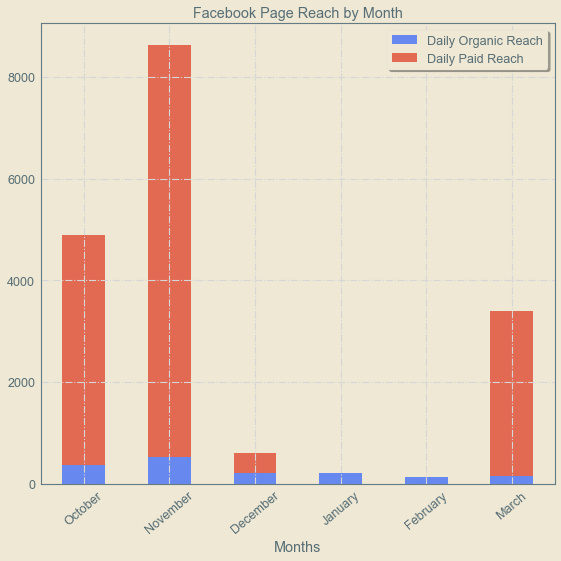

In [63]:
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(10,10))

d_reach_month.plot.bar(stacked = True, colormap = my_cmap)
plt.xticks(rotation=40)
plt.xlabel('Months')
plt.title('Facebook Page Reach by Month')
plt.legend(shadow = True)

plt.savefig('Monthly Daily Facebook Page Reach.jpg', dpi = 200)

plt.tight_layout()
plt.show()

In [64]:
df_day_imp, cols_imp = get_impressions(df_day)

In [65]:
df_day_imp = get_dates(df_day_imp)

<ipython-input-27-91bdf960b73b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['day_week'] = pd.to_datetime(x.Date, yearfirst=True).dt.day_name()
<ipython-input-27-91bdf960b73b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['week']=pd.to_datetime(x.Date, yearfirst=True).dt.isocalendar().week
<ipython-input-27-91bdf960b73b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [66]:
df_day_imp = df_day_imp.fillna(0)

In [67]:
df_day_imp.columns

Index(['Date', 'Daily Total Impressions', 'Daily Organic impressions',
       'Daily Paid Impressions', 'Daily Viral impressions',
       'Daily Total Impressions of your posts',
       'Daily Organic impressions of your posts',
       'Daily Paid impressions of your posts',
       'Daily Viral Impressions Of Your Posts', 'day_week', 'week', 'month',
       'year'],
      dtype='object')

In [54]:
df_day_imp[['Daily Organic impressions', 'Daily Paid Impressions']] = df_day_imp[['Daily Organic impressions', 'Daily Paid Impressions']].astype(int)

In [57]:
d_imp_day =  df_day_imp.groupby(['day_week'])[['Daily Organic impressions', 'Daily Paid Impressions']].mean().reindex(day_order)

,Daily Organic impressions,Daily Paid Impressions
day_week,,
Monday,501.880000,2518.000000
Tuesday,499.240000,2892.360000
Wednesday,547.400000,3452.440000
Thursday,476.500000,3079.307692
Friday,475.923077,2640.769231
Saturday,321.923077,2990.923077
Sunday,331.538462,3642.384615


In [74]:
d_imp_day_ = d_imp_day.melt(ignore_index=False, value_name='Amount', var_name='Type of Impression').copy()

Reach : The number of people who had any content from your Page or about your Page enter their screen. This includes posts, check-ins, ads, social information from people who interact with your Page and more.

Imp : The number of times any content from your Page or about your Page entered a person's screen. This includes posts, stories, check-ins, ads, social information from people who interact with your Page and more. (Total Count)"




## Barplot  about Impressions by Week day 

In [75]:
d_imp_day_ = d_imp_day_.reset_index()

In [88]:
d_imp_day_

,day_week,Type of Impression,Amount
0,Monday,Daily Organic impressions,501.880000
1,Tuesday,Daily Organic impressions,499.240000
2,Wednesday,Daily Organic impressions,547.400000
3,Thursday,Daily Organic impressions,476.500000
4,Friday,Daily Organic impressions,475.923077
5,Saturday,Daily Organic impressions,321.923077
6,Sunday,Daily Organic impressions,331.538462
7,Monday,Daily Paid Impressions,2518.000000
8,Tuesday,Daily Paid Impressions,2892.360000
9,Wednesday,Daily Paid Impressions,3452.440000


In [100]:
d_imp_day_['Percentage'] = d_imp_day_.groupby('day_week')['Amount'].apply(lambda x: 100 * x / (x.sum())).round(2)

In [101]:
d_imp_day_.columns

Index(['day_week', 'Type of Impression', 'Amount', 'Percentage'], dtype='object')

In [117]:
d_imp_day_.to_csv('Page Impressions.csv')

In [97]:
d_imp_day_.drop('% Organic', axis = 1, inplace=True)

In [109]:

fig = px.colors.sequential.swatches_continuous()
fig.show()

In [116]:
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(10,10))
for i in ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']:
    fig = px.bar(data_frame=d_imp_day_, x ='day_week', y = 'Amount', color='Type of Impression',
       title= 'Facebook Page Impressions by Week Day', hover_data= ['Percentage'], template= i)
    fig.show()

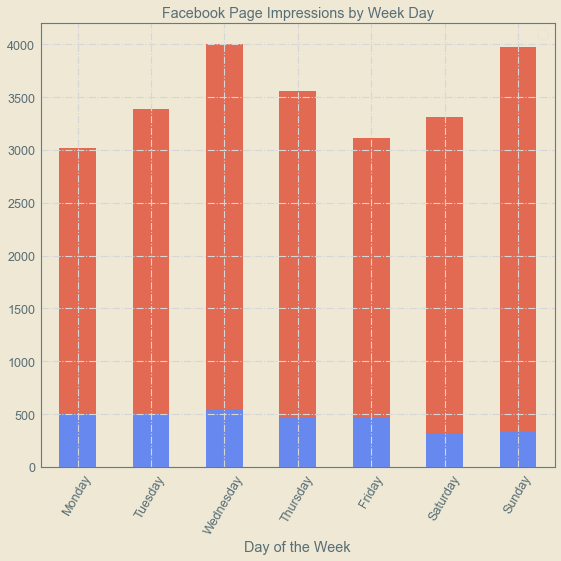

In [76]:
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(10,10))

d_imp_day.plot.bar(stacked = True , colormap= my_cmap)
plt.xlabel('Day of the Week')
plt.xticks(rotation=60)
plt.title('Facebook Page Impressions by Week Day')
plt.legend('')

plt.savefig('Week Day Daily Facebook Page Impressions.jpg', dpi = 200)

plt.tight_layout()
plt.show()

## Barplot  about Impressions by Month

In [77]:
d_imp_month =  df_day_imp.groupby(['month'])[['Daily Organic impressions', 'Daily Paid Impressions']].mean().reindex(month_order)

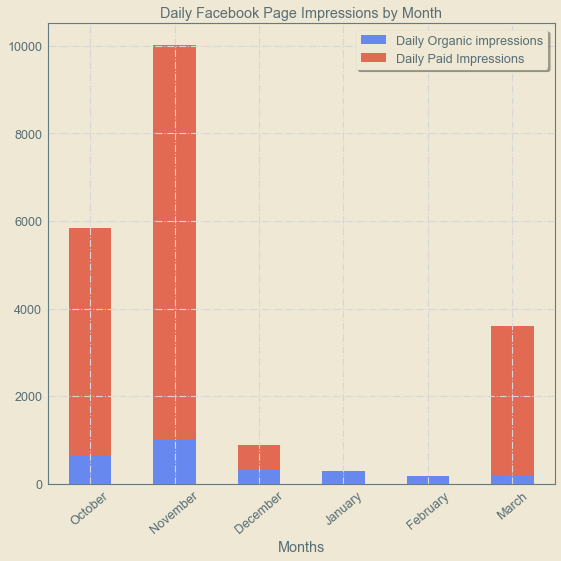

In [78]:
d_imp_month.plot.bar(stacked = True, colormap = my_cmap )
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(10,10))
plt.xticks(rotation=40)
plt.xlabel('Months')
plt.legend(shadow = True)
plt.title('Daily Facebook Page Impressions by Month')
plt.savefig('Monthly Daily Facebook Page Impressions.jpg', dpi = 200)
plt.tight_layout()
plt.show()

In [58]:
df_day.drop(cols_imp, axis = 1, inplace=True)

In [59]:
df_day.drop(col_day_reach, axis = 1, inplace=True)

## Lineplot about User Engagement

### HOW DO I CHANGE THE Y LABEL AND CENTER THE TITLE

In [60]:
week_order = list(np.array(range(40, 54)))+list(np.array(range(1, 13)))


In [61]:
df_day = get_dates(df_day)

In [62]:
df_day = df_day.fillna(0)

In [63]:
df_day.loc[(df_day['year']==2021) & (df_day['week']==53), 'week'] = 1

In [64]:
df_day['Daily Page Engaged Users'] = df_day['Daily Page Engaged Users'].astype(int)

In [65]:
df_day_engaged = df_day.groupby(['week'])[['year','Daily Page Engaged Users']].mean().reindex(week_order)

In [66]:
df_day_engaged

,year,Daily Page Engaged Users
week,,
40,2020,46.250000
41,2020,99.857143
42,2020,74.142857
43,2020,91.571429
44,2020,109.857143
45,2020,231.714286
46,2020,348.000000
47,2020,260.857143
48,2020,230.714286


In [67]:
cols_engage = [i for i in df_day if 'Engaged' in i]

In [68]:
df_day['Daily Logged-in Page Views'] = df_day['Daily Logged-in Page Views'].astype(int)

df_day_logged = df_day.groupby(['week'])[['year','Daily Logged-in Page Views']].mean().reindex(week_order)


In [69]:

df_day_logged

,year,Daily Logged-in Page Views
week,,
40,2020,26.500000
41,2020,29.000000
42,2020,16.285714
43,2020,33.000000
44,2020,79.571429
45,2020,61.714286
46,2020,158.142857
47,2020,69.571429
48,2020,44.428571


In [84]:
description

{'Lifetime Total Likes': 'Lifetime: The total number of people who have liked your Page. (Unique Users)',
 'Daily New Likes': 'Daily: The number of new people who have liked your Page (Unique Users)',
 'Daily Unlikes': 'Daily: The number of Unlikes of your Page (Unique Users)',
 'Daily Page Engaged Users': 'Daily: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
 'Weekly Page Engaged Users': 'Weekly: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
 '28 Days Page Engaged Users': '28 Days: The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)',
 'Daily Total Reach': 'Daily: The number of people who had any content from your Page or about your Page enter their screen. This includes posts, check-ins, ads, social information from people who interact with your Page and more. (Unique Users)',
 'Weekly Total

Engage : The number of people who engaged with your Page. Engagement includes any click or story created. (Unique Users)
    
Logged-in : Daily: Page Views from users logged into Facebook (Total Count)

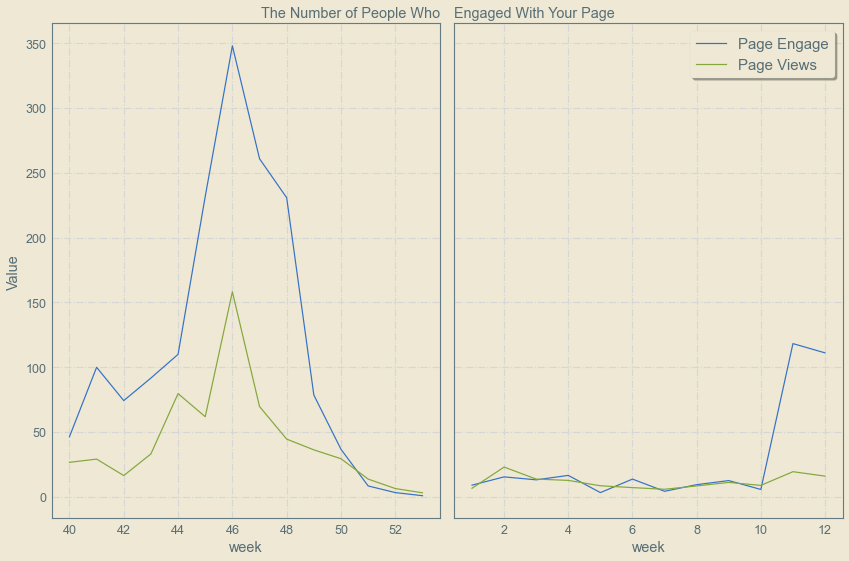

In [95]:
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(15,10))

fig, axs = plt.subplots(1,2, sharey=True)

axs[0].set_title('The Number of People Who', loc='right')
axs[1].set_title('Engaged With Your Page', loc='left')

sns.lineplot(data = df_day_engaged.query('year == 2020'), x = 'week', y = 'Daily Page Engaged Users', ax=axs[0], palette='Set2')
axs[0].set_ylabel('Value')
sns.lineplot(data = df_day_engaged.query('year == 2021'), x = 'week', y = 'Daily Page Engaged Users', ax=axs[1], palette='Set2')

sns.lineplot(data = df_day_logged.query('year == 2020'), x = 'week', y = 'Daily Logged-in Page Views', ax=axs[0], palette='Set2')
sns.lineplot(data = df_day_logged.query('year == 2021'), x = 'week', y = 'Daily Logged-in Page Views', ax=axs[1], palette='Set2')
# il faut mettre legend
plt.legend(['Page Engage', 'Page Views'], shadow = True, fontsize = 15.0)
plt.savefig('Number of People who Engaged with your Page.jpg', dpi=200)
plt.tight_layout()
plt.show()

In [ ]:
def get_count(x):
    l = ['Date']
    for i in x:
        if 'click count' in i :
            l.append(i)
            
    return x[l], l[1:]
    

In [ ]:
df_day_count, cols_counts = get_count(df_day) 

In [ ]:
df_day_count.replace(0 or 0.0, np.nan, inplace=True)

In [ ]:
df_day_count = drop_full_null_cols(df_day_count)

In [ ]:
df_day.drop(cols_counts, axis = 1, inplace=True )

In [ ]:
cols_freq = [i for i in df_day.columns if 'Frequency' in i]

In [ ]:
cols_freq

In [ ]:
df_day.drop(cols_freq, axis = 1, inplace=True)

In [ ]:
cols_langue = [i for i in df_day.columns if 'Language' in i]

In [ ]:
df_day.drop(cols_langue, axis = 1, inplace=True) 

In [ ]:
df_day

In [ ]:
for i in cols_freq:
    if i in description:
        del description[i]

In [ ]:
for i in cols_langue:
    if i in description:
        del description[i]

In [ ]:
for i in cols_imp :
    if i in description:
        del description[i]

In [ ]:
for i in col_day_reach :
    if i in description:
        del description[i]

In [ ]:
for i in cols_counts :
    if i in description:
        del description[i]

In [ ]:
for i in cols_engage :
    if i in description:
        del description[i]

In [ ]:
for i in df_week.columns :
    if i in description:
        del description[i]

In [ ]:
for i in df_month.columns :
    if i in description:
        del description[i]

In [ ]:
for i in cols_feedback:
    if i in description:
        del description[i]

In [ ]:
def get_feedback(x):
    l = ['Date']
    for i in x:
        if 'feedback' in i  or 'Feedback' in i:
            l.append(i)
            
    return x[l], l[1:]

In [ ]:
df_day_feedback, cols_feedback = get_feedback(df_day) 

In [ ]:
df_day.drop(cols_feedback, axis = 1, inplace=True)

In [ ]:
df_day_feedback

In [ ]:
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(15,15))
sns.lineplot(data = df_day_reach, x = 'week', y = 'Daily Total Reach')
plt.tight_layout()
plt.show()

In [ ]:
total = jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(25,25))
total = sns.catplot(data = df_day_reach, col = 'day_week', x = 'week', y = 'Daily Total Reach')
total.set_xticklabels(rotation=60)

#plt.title('')
#plt.ylabel('')
#plt.savefig('.jpg', dpi=200)
plt.tight_layout()
plt.show()

In [ ]:
get_most_words(df_day)

In [ ]:
get_dates(df_day)

In [ ]:
filter_col4 = [col for col in df_week if 'People Talking' in col]
len(filter_col4)

In [ ]:
df_week.drop(filter_col4, axis=1, inplace=True)

In [ ]:
filter_col5 = [col for col in df if 'Logged' in col]
len(filter_col5)

In [ ]:
df.drop(filter_col5, axis=1, inplace=True)
df.head()

In [ ]:
filter_col16 = [col for col in df_week if 'Talking' in col]
len(filter_col16)

In [ ]:
df_week.drop(filter_col16, axis=1, inplace=True)
df_week.head()

In [ ]:
df_week.columns

In [ ]:
filter_col17 = [col for col in df if 'Frequency' in col]
len(filter_col17)

In [ ]:
df.drop(filter_col17, axis=1, inplace=True)
df.head()

In [ ]:
df_week

In [ ]:
df_day

In [ ]:
df_week_imp, cols_impression = get_impressions(df_week)

In [ ]:
df_week_imp

#### And drop these impressions columns from the main DF

In [ ]:
df_week.drop(cols_impression, axis = 1, inplace=True)



#### Lets drop rows where all the columns have NaN values (expcet of course the date)

In [ ]:
df_week_imp = drop_full_null_rows(df_week_imp)

#### and pass the nan values as 0 

In [ ]:
df_week

In [ ]:
df_week_imp = df_week_imp.fillna(0)

In [ ]:
df_week_imp[cols_impression] = df_week_imp[cols_impression].astype(int)

In [ ]:
df_week_imp = get_dates(df_week_imp)

In [ ]:
df_week_imp

In [ ]:
d = df_week_imp.groupby(['day_week'])[['Weekly Organic impressions', 'Weekly Paid Impressions']].mean().astype(int)
d.plot.bar(stacked = True)


In [ ]:
d = df_week_imp.groupby(['day_week'])[['Weekly Organic impressions']].mean().astype(int)
order_week = 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'
d.plot.line()

In [ ]:
df_week_imp

In [ ]:

total = jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(20,20))
total = sns.catplot(data = df_week_imp, col = 'month', x = 'day_week', y = 'Weekly Organic impressions',palette = "RdBu_r", kind='swarm')
total.set_xticklabels(rotation=60)

#plt.title('')
#plt.ylabel('')
#plt.savefig('.jpg', dpi=200)
plt.tight_layout
plt.show()

#### Lets get the city

In [ ]:
def get_city(x):
    l = ['Date']
    for i in x:
        if 'City' in i or 'city' in i:
            l.append(i)
            
    return x[l], l[1:]

In [ ]:
df_week_city, cols_city = get_city(df_week)

In [ ]:
df_week_city

#### And encore drop the city columns from the main DF

In [ ]:
df_week.drop(cols_city, axis = 1 ,inplace=True)

#### and drop the nan rows

In [ ]:
df_week_city = drop_full_null_rows(df_week_city)

In [ ]:
df_week_city

In [ ]:
df_week_city =df_week_city.fillna(0)

In [ ]:
def get_country(x):
    l = ['Date']
    for i in x:
        if 'Country' in i or 'country' in i:
            l.append(i)
            
    return x[l], l[1:]

In [ ]:
def get_city(x):
    l = ['Date']
    for i in x:
        if 'City:' in i or 'city' in i:
            l.append(i)
            
    return x[l], l[1:]

In [ ]:
df_day_ville, cols_ville = get_city(df_day) 

In [ ]:
df_day_ville

In [ ]:
df_day_ville.set_index(['Date'], inplace=True)

In [ ]:
df_day_ville

In [ ]:
df_day_ville.columns = df_day_ville.columns.str.lstrip('Daily City: People Talking About This')

In [ ]:
df_day_ville_melt = df_day_ville.melt(ignore_index= False).dropna()

In [ ]:
df_day_ville_melt

In [ ]:
df_day_ville_melt[['Ville']] =df_day_ville_melt['variable'].str.split(',').str.get(0)

In [ ]:
df_day_ville_melt

In [ ]:
df_day_ville_melt[['Pays']] =df_day_ville_melt['variable'].str.split(',').str.get(-1)

In [ ]:
df_day_ville_melt.loc[df_day_ville_melt['Pays'].str.startswith('-'), 'Pays'] = 'France'

In [ ]:
df_day_ville_melt

In [ ]:
df_day_ville_melt['Ville'] = [i.strip('-') for i in  df_day_ville_melt['Ville']]
df_day_ville_melt

In [ ]:
df_day_ville_melt.drop('variable', axis = 1, inplace=True)

In [ ]:
df_day_ville_melt.rename(columns = {'value': 'Talking About'}, inplace=True)

In [ ]:
df_day_ville_melt['Talking About'] = df_day_ville_melt['Talking About'].astype(int)

In [ ]:
df_day_ville_melt['Date'] = df_day_ville_melt.index

In [ ]:
df_day_ville_melt.info()

In [ ]:
df_day_ville_melt = get_dates(df_day_ville_melt)

In [ ]:
df_day_ville_melt

In [ ]:
sns.catplot(data = df_day_ville_melt, col='Pays', x = 'day_week', y = 'Talking About', hue = 'Ville', kind='bar', orient='v')

In [ ]:
sns.barplot(data = df_day_ville_melt, x = 'day_week', y = 'Talking About', hue='Ville')

In [ ]:
for i in df_day_ville_melt:
    l = re.search

In [ ]:
df_foooo=df_foooo.melt().dropna()

df_foooo

df_foooo[['Gender','Age']]=df_foooo['variable'].str.split(' - ').str.get(-1).str.split('.', expand=True)

df_foooo.drop('variable', axis=1, inplace=True)

df_foooo['value']=df_foooo['value'].astype(int)

dd = df_foooo.groupby(['Gender','Age']).sum().reset_index()

dd = dd[:14]

In [ ]:
description

In [ ]:
df_week_country, cols_country = get_country(df_week)

In [ ]:
df_week_country

In [ ]:
drop_full_null_rows(df_week_country)

In [ ]:
df_week.drop(cols_country, axis = 1, inplace = True)

In [ ]:
df_week_demo, cols_demo = get_demog(df_week)

In [ ]:
df_week_demo = get_dates(df_week_demo).copy()

In [ ]:
df_week_imp = get_dates(df_week_imp).copy()

In [ ]:
df_week_city

In [ ]:
df_week

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [ ]:
df_week_imp

In [ ]:
df_week_imp_2020 = df_week_imp.query('year == 2020').groupby(['week'])[['Weekly Organic impressions', 'Weekly Paid Impressions']].mean()
df_week_imp_2020

In [ ]:
df_week_imp_2021 = df_week_imp.query('year == 2021').groupby(['week'])[['Weekly Organic impressions', 'Weekly Paid Impressions']].mean()
df_week_imp_2021

In [ ]:
d20 = df_week_imp_2020.melt(var_name = 'Impressions Type', value_name = 'Total', ignore_index = False)
d20

In [ ]:
d21 = df_week_imp_2021.melt(var_name = 'Impressions Type', value_name = 'Total', ignore_index = False)
d21

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw=dict(width_ratios=[4, 3]))



d20.plot.bar(stacked = True, ax=axs[0], colormap = "Set2")
#axs[0].set_title('', fontweight='bold', fontsize=15, fontname = 'candara')
#axs[0].set_xticklabels([''], rotation=0, fontweight='bold', fontsize=13, fontname = 'candara')
#axs[0].set_xlabel('')






d21.plot.bar(stacked = True, ax=axs[1], colormap = "Set2")
#axs[1].set_title('Financial Distribution (2018)', fontweight='bold', fontsize=15, fontname = 'candara')
#axs[1].set_xticklabels(['Elected', 'Non Elected'], rotation=0, fontweight='bold', fontsize=13, fontname = 'candara')
#axs[1].set_xlabel('Results')

fig.tight_layout()
#fig.savefig('Source-Comparison.jpg', dpi=200) 


#### Weekly Total Impressions

In [ ]:
total = jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(20,20))
total = sns.catplot(data = df_week_imp , col = 'year', x = 'day_week', y = 'Weekly Total Impressions', palette = "RdBu_r")
total.set_xticklabels(rotation=60)

#plt.title('')
#plt.ylabel('')
#plt.savefig('.jpg', dpi=200)
plt.tight_layout
plt.show()


In [ ]:
total = jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(20,20))
total = sns.catplot(data = df_week_imp, col = 'year', x = 'month', y = 'Weekly Total Impressions', order=months ,palette = "RdBu_r")
total.set_xticklabels(rotation=60)

#plt.title('')
#plt.ylabel('')
#plt.savefig('.jpg', dpi=200)
plt.tight_layout
plt.show()

#### Weekly Paid Impressions

In [ ]:
total = jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(20,20))
total = sns.catplot(data = df_week_imp, col = 'year', x = 'month', y = 'Weekly Paid Impressions', order=months ,palette = "RdBu_r")
total.set_xticklabels(rotation=60)

#plt.title('')
#plt.ylabel('')
#plt.savefig('.jpg', dpi=200)
plt.tight_layout
plt.show()


#### Weekly Total Impressions of your posts

In [ ]:
total = jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(20,20))
total = sns.catplot(data = df_week_imp, col = 'year', x = 'month', y = 'Weekly Total Impressions of your posts', order=months ,palette = "RdBu_r")
total.set_xticklabels(rotation=60)

#plt.title('')
#plt.ylabel('')
#plt.savefig('.jpg', dpi=200)
plt.tight_layout
plt.show()

#### Weekly Viral Impressions Of Your Posts

In [ ]:
df_week_imp

In [ ]:
total = jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(20,20))
total = sns.catplot(data = df_week_imp, col = 'year', x = 'month', y = 'Weekly Viral Impressions Of Your Posts', order=months ,palette = "RdBu_r")
total.set_xticklabels(rotation=60)

#plt.title('')
#plt.ylabel('')
#plt.savefig('.jpg', dpi=200)
plt.tight_layout
plt.show()

In [ ]:
df_week = drop_full_null_rows(df_week)

In [ ]:
df_week_demo.head(15)

In [ ]:
def get_reach(x):
    l = ['Date']
    for i in x:
        if 'reach' in i or 'Reach' in i:
            l.append(i)
            
    return x[l], l[1:]

In [ ]:
df_week_demo_reach, cols_demo_reach = get_reach(df_week_demo)

In [ ]:

df_week_demo_reach

In [ ]:
df_week

In [ ]:
filter_language = [col for col in df_week if 'Language' in col]

In [ ]:
filter_language

In [ ]:
df_week.drop(filter_language, axis = 1, inplace=True)

In [ ]:
df_week

In [ ]:
for i in df_week.columns:
    print(i)

In [ ]:
df_week['Weekly Reach Demographics - F.13-17']

In [ ]:
description

In [ ]:
df_week.set_index(['Date'], inplace=True)

In [ ]:
df_foooo=df_week[df_week.columns[df_week.columns.str.contains('Weekly Reach Dem')]]

In [ ]:
df_foooo

In [ ]:
df_foooo=df_foooo.melt(ignore_index=False).dropna()

In [ ]:
df_foooo

In [ ]:
df_foooo['Date'] = df_foooo.index
df_foooo = get_dates(df_foooo)

In [ ]:
df_day_ville_melt['Date'] = df_day_ville_melt.index

df_day_ville_melt.info()

df_day_ville_melt = get_dates(df_day_ville_melt)

df_day_ville_melt

In [ ]:
df_foooo[['Gender','Age']]=df_foooo['variable'].str.split(' - ').str.get(-1).str.split('.', expand=True)

In [ ]:
df_foooo

In [ ]:
df_foooo.drop(['variable', 'Date'], axis=1, inplace=True)

In [ ]:
df_foooo.reset_index(inplace=True)

In [ ]:

df_foooo.value = df_foooo.value.astype(int)

In [ ]:
df_foooo

In [ ]:
sns.barplot(data = df_foooo, x = 'day_week', y = 'value', hue = 'Gender', palette='Set1')

In [ ]:
dd = df_foooo.groupby(['day_week'])[['value']].sum().reindex(day_order)
dd

In [ ]:
df_foooo['value']=df_foooo['value'].astype(int)

In [ ]:
df_foooo = df_foooo.query("Gender != 'U'")

In [ ]:
dd = df_foooo.groupby(['Gender','Age']).sum().reset_index()

dd = dd[:14]

In [ ]:
jtplot.style(theme='solarizedl', gridlines= '-.', figsize=(10,10))
sns.barplot(data = dd, x = 'Gender', y = 'value', hue='Age')


In [ ]:
sns.barplot(data = dd, x = 'Age', y = 'value', hue = 'Gender')


In [ ]:
df_foooo = df_foooo.query("Gender != 'U'")

In [ ]:
df_foooo

In [ ]:
d = df_foooo.groupby(['day_week'])[['Gender', 'Age']].count().reindex(day_order)

In [ ]:
d

In [ ]:
d = pd.pivot_table(data = df_foooo, index = 'day_week', columns=['Gender', 'Age'], values = 'value', aggfunc=['sum']).reindex(day_order)

In [ ]:
d

In [ ]:
d.plot.bar()

In [ ]:
d.melt()

In [ ]:
sns.scatterplot(data = d, x = 'day_week', hue = 'F', size='Age')

In [ ]:
d = df_foooo.groupby(['day_week'])[][['year', 'Gender', 'Age']].sum().reindex(day_order)
d


In [ ]:
sns.catplot(data= d, cols = 'year', x= d.index, hue='Gender')

In [ ]:
df_week_demo_reach = get_dates(df_week_demo_reach)

In [ ]:
df_week_demo_reach.columns

In [ ]:
df_week_demo_reach = df_week_demo_reach.melt()

In [ ]:
df_week_demo_reach